## AUTO PULSE- NAVIGATING SALES TREND

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA CLEANING

##### IMPORTING CSV

In [74]:
df= pd.read_csv("cr.csv",encoding='unicode_escape')

In [75]:
df.head()

,year,make,model,body,transmission,state,odometer,color,interior,seller,mmr,sellingprice,selldate
0,2014,BMW,6 Series,Convertible,automatic,ca,8819,black,black,the hertz corporation,68000,67200,2014
1,2014,Kia,Sorento,SUV,automatic,ca,9393,white,beige,kia motors america inc,20800,30000,2014
2,2014,BMW,3 Series,Sedan,automatic,ca,1331,gray,black,financial services remarketing (lease),31900,30000,2015
3,2015,Volvo,S60,Sedan,automatic,ca,14282,white,black,volvo na rep/world omni,27500,27750,2015
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,2641,gray,black,financial services remarketing (lease),66000,67000,2014


##### DROPPING NULL VALUES

In [77]:
cdrop=['model','body','transmission','state','color','interior','seller','mmr']
df1=df.drop(columns=cdrop)
df1

,year,make,odometer,sellingprice,selldate
0,2014,BMW,8819,67200,2014
1,2014,Kia,9393,30000,2014
2,2014,BMW,1331,30000,2015
3,2015,Volvo,14282,27750,2015
4,2014,BMW,2641,67000,2014
...,...,...,...,...,...
472320,2011,BMW,66403,22800,2015
472321,2012,Ram,54393,30800,2015
472322,2012,BMW,50561,34000,2015
472323,2015,Nissan,16658,11100,2015


In [80]:
df1=df1.drop(columns='odometer')

In [81]:
df1

,year,make,sellingprice
0,2014,BMW,67200
1,2014,Kia,30000
2,2014,BMW,30000
3,2015,Volvo,27750
4,2014,BMW,67000
...,...,...,...
472320,2011,BMW,22800
472321,2012,Ram,30800
472322,2012,BMW,34000
472323,2015,Nissan,11100


In [82]:
df3=df1['sellingprice'].groupby(df2['make']).mean().round(2)
df3

make
Acura             13104.78
Aston Martin      55500.00
Audi              20010.17
BMW               21292.67
Bentley           72713.33
Buick             10588.18
Cadillac          14733.20
Chevrolet         11866.21
Chrysler          10627.09
Daewoo              450.00
Dodge             10963.79
FIAT               9927.42
Ferrari          128852.94
Fisker            46461.11
Ford              14829.81
GMC               16769.47
Geo                 576.56
HUMMER            15404.61
Honda             10942.93
Hyundai           11062.02
Infiniti          20562.80
Isuzu              1774.16
Jaguar            19429.85
Jeep              14755.98
Kia               11767.49
Lamborghini      111500.00
Land Rover        33225.29
Lexus             20284.20
Lincoln           17547.19
Lotus             40800.00
MINI              12389.43
Maserati          43729.82
Mazda             10228.57
Mercedes-Benz     21314.87
Mercury            3996.94
Mitsubishi         8035.46
Nissan            11745

In [84]:
df1=df1.drop(columns='sellingprice')

In [85]:
df5=pd.merge(df3,df1,on='make')
df5

,make,sellingprice,year
0,Acura,13104.78,2014
1,Acura,13104.78,2014
2,Acura,13104.78,2014
3,Acura,13104.78,2012
4,Acura,13104.78,2012
...,...,...,...
472320,smart,6301.60,2008
472321,smart,6301.60,2013
472322,smart,6301.60,2013
472323,smart,6301.60,2012


In [87]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with columns 'odometer' and 'sellingprice'
columns_to_scale = ['sellingprice']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the specified columns
df5_scaled = df5.copy()  # Create a copy of the original DataFrame
df5_scaled[columns_to_scale] = scaler.fit_transform(df5_scaled[columns_to_scale])

# Now df_scaled contains the scaled values of 'odometer' and 'sellingprice' columns

# Print the scaled DataFrame
print(df5_scaled)

         make  sellingprice  year
0       Acura     -0.133593  2014
1       Acura     -0.133593  2014
2       Acura     -0.133593  2014
3       Acura     -0.133593  2012
4       Acura     -0.133593  2012
...       ...           ...   ...
472320  smart     -1.684953  2008
472321  smart     -1.684953  2013
472322  smart     -1.684953  2013
472323  smart     -1.684953  2012
472324  smart     -1.684953  2008

[472325 rows x 3 columns]


In [100]:
df8=df5_scaled.sort_values(by='year')
df8

,make,sellingprice,year
350453,Mercedes-Benz,1.738590,1990
80375,Chevrolet,-0.416030,1990
425011,Toyota,-0.289186,1990
226972,Honda,-0.626570,1990
338830,Mazda,-0.789468,1990
...,...,...,...
68876,Chevrolet,-0.416030,2015
186586,Ford,0.259773,2015
68877,Chevrolet,-0.416030,2015
23596,BMW,1.733528,2015


In [112]:
df9=df8['sellingprice'].groupby(df8['make']).mean()
df9


make
Acura            -0.133593
Aston Martin      9.533978
Audi              1.441074
BMW               1.733528
Bentley          13.459211
Buick            -0.707465
Cadillac          0.237743
Chevrolet        -0.416030
Chrysler         -0.698592
Daewoo           -3.019319
Dodge            -0.621813
FIAT             -0.858141
Ferrari          26.260977
Fisker            7.472800
Ford              0.259773
GMC               0.702082
Geo              -2.990459
HUMMER            0.390847
Honda            -0.626570
Hyundai          -0.599413
Infiniti          1.567092
Isuzu            -2.717365
Jaguar            1.308741
Jeep              0.242937
Kia              -0.438542
Lamborghini      22.303909
Land Rover        4.454577
Lexus             1.503562
Lincoln           0.879429
Lotus             6.181872
MINI             -0.296718
Maserati          6.849972
Mazda            -0.789468
Mercedes-Benz     1.738590
Mercury          -2.210495
Mitsubishi       -1.289573
Nissan           -0.443

In [114]:
df4=df8['sellingprice'].groupby(df8['year']).mean()
df4

year
1990   -0.001536
1991    0.127615
1992   -0.208219
1993   -0.143757
1994   -0.224188
1995   -0.064186
1996   -0.175687
1997   -0.209052
1998   -0.165217
1999   -0.145098
2000   -0.105786
2001   -0.114009
2002   -0.069626
2003   -0.074914
2004   -0.063132
2005   -0.135794
2006   -0.049213
2007   -0.088333
2008   -0.041191
2009   -0.125415
2010   -0.086892
2011    0.201340
2012    0.084705
2013    0.016748
2014   -0.023015
2015   -0.062155
Name: sellingprice, dtype: float64

In [104]:
df7 = df7.loc[(df7['year'] >2014) & (df7['year'] <=2015)]
df7
df=df7['sellingprice'].groupby(df7['make'],df7['year']).mean()

,make,year,sellingprice
464333,Chevrolet,2015,-0.416030
464334,Chevrolet,2015,-0.416030
464335,Chevrolet,2015,-0.416030
464336,Chevrolet,2015,-0.416030
464337,Chevrolet,2015,-0.416030
...,...,...,...
472320,Chevrolet,2015,-0.416030
472321,Ford,2015,0.259773
472322,Chevrolet,2015,-0.416030
472323,BMW,2015,1.733528


In [153]:
df=df.dropna()
print("ROWS WITH EMPTY CELL DROPPED")
df.isnull().sum()

ROWS WITH EMPTY CELL DROPPED


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [152]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [155]:
df["saledate"].head()

0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2    Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3    Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4    Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
Name: saledate, dtype: object

In [14]:
df.loc[:, 'saledate'] = df['saledate'].astype(str)
print("saledate converted to string type")
df["saledate"].head()

saledate converted to string type


0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2    Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3    Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4    Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
Name: saledate, dtype: object

In [15]:
df['saledate'] = df['saledate'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [16]:
df.loc[:, 'date'] = df['saledate'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
df.loc[:, 'time'] = df['saledate'].apply(lambda x: ' '.join(x.split(' ')[3:]))

In [17]:
df.drop(columns=['saledate'], inplace=True)


In [18]:
df.drop(columns=['time'], inplace=True)

In [19]:
df['year'] = df['date'].str[-4:] 

In [20]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,date
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Dec 16 2014
1,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Dec 16 2014
2,2015,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Jan 15 2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Jan 29 2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Dec 18 2014


In [14]:
duplicate_rows = df[df.duplicated(keep=False)]

#### EXPLORING TRENDS IN THE MARKET

####  Which vehicle brands/models are the top sellers overall?

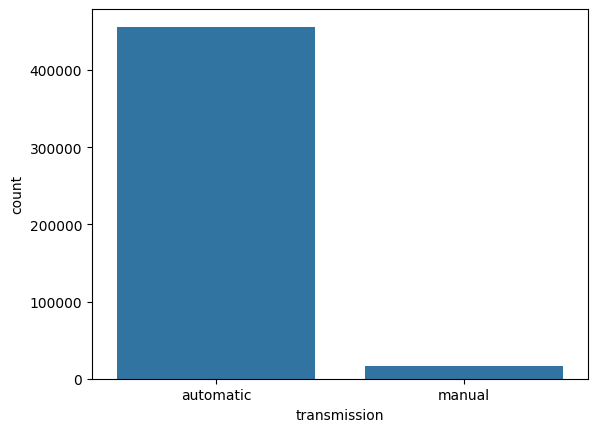

In [41]:
sns.countplot(df,x='transmission')
plt.show()

#### What is the trend in vehicle sales over the years covered by the dataset?

In [35]:
df['selldate'].mode()

0    2015
Name: selldate, dtype: int64

In [40]:
avg = df.groupby('selldate')['sellingprice'].mean()
print(avg)

selldate
2014    12715.167849
2015    13773.022203
Name: sellingprice, dtype: float64


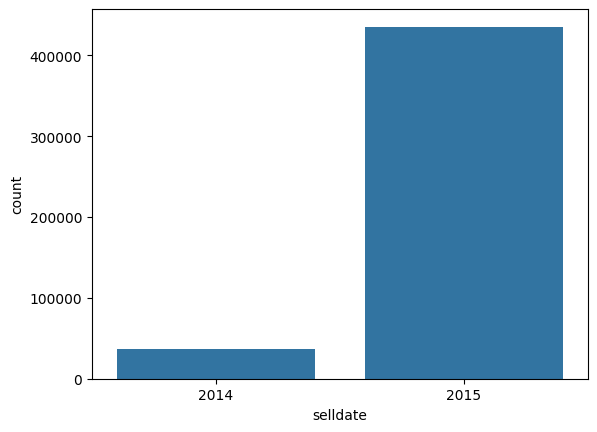

In [45]:
sns.countplot(df,x='selldate')
plt.show()

##### 2015 recorded highest sales count as well as it has highest avg selling price as compared to 2014

#### What are the most popular types of vehicles (sedans, SUVs, trucks, etc.) in terms of sales volume?

In [133]:
df['body'].describe()

count     472325
unique        85
top        Sedan
freq      174647
Name: body, dtype: object

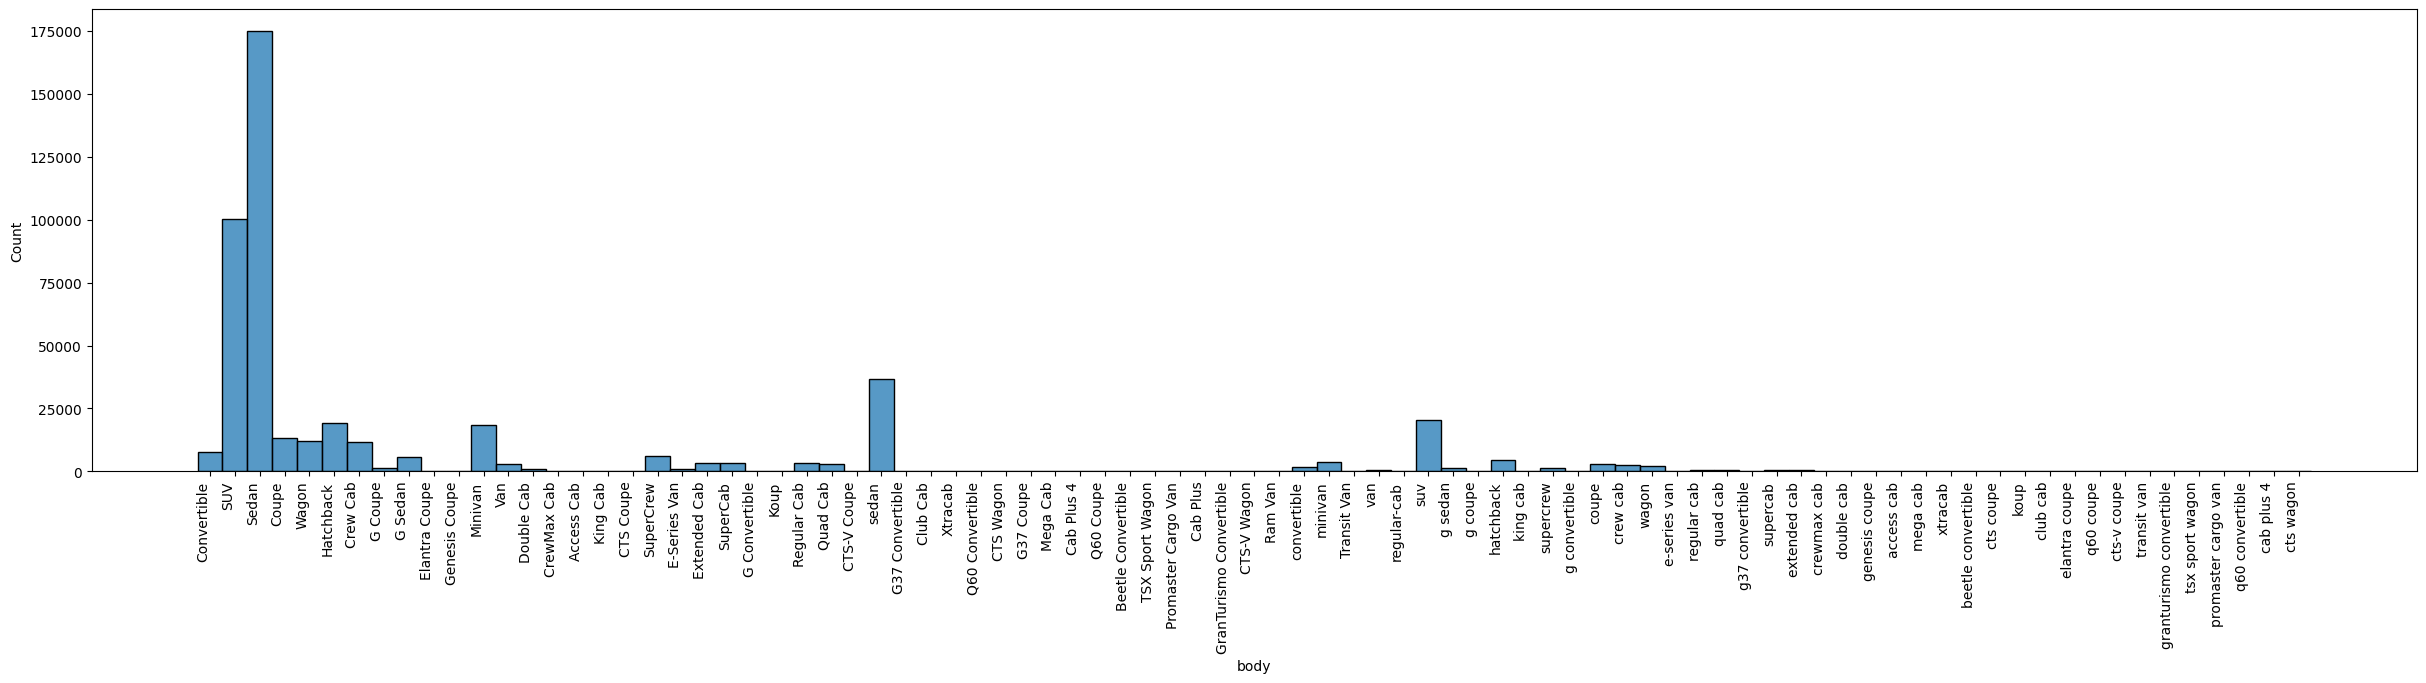

In [134]:
plt.figure(figsize=(30,6))
sns.histplot(df,x='body',bins=30)
plt.xticks(rotation=90,ha='right')
plt.show()

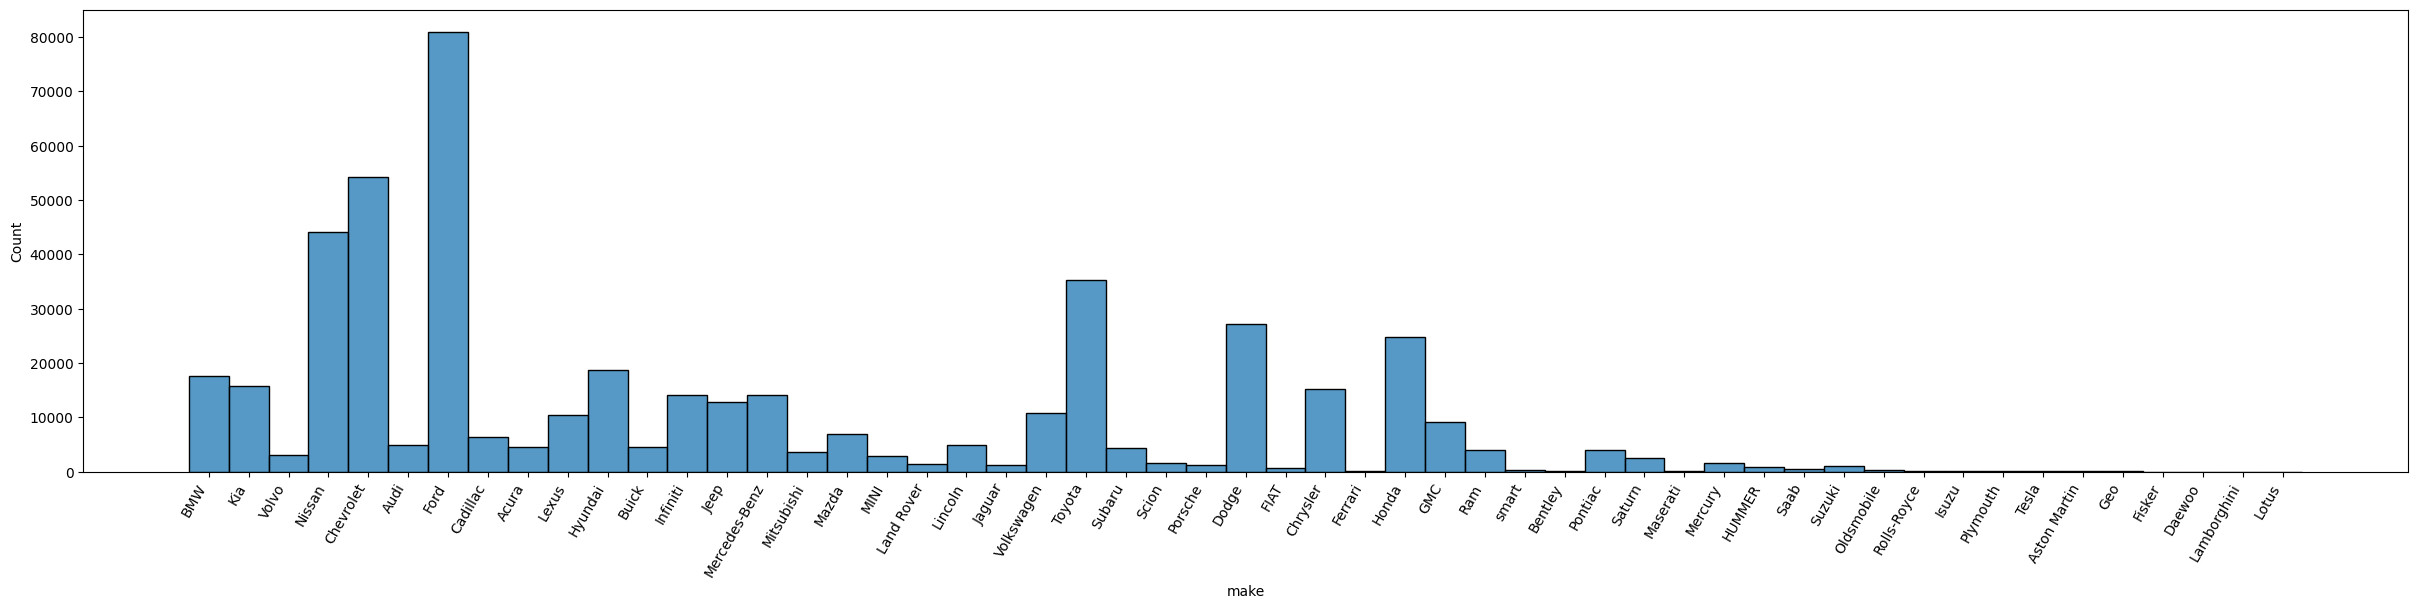

In [74]:
plt.figure(figsize=(30,6))
sns.histplot(x='make',data=df,bins=30)

plt.show()

In [139]:
uk=['body','make']
sk=df[uk]
sk.head(10)

,body,make
0,Convertible,BMW
1,SUV,Kia
2,Sedan,BMW
3,Sedan,Volvo
4,Sedan,BMW
5,Sedan,Nissan
6,Sedan,BMW
7,Sedan,Chevrolet
8,Sedan,Audi
9,Convertible,Chevrolet


### Sales performance in different regions/countries

In [60]:
df['state'].describe()

count     472325
unique        34
top           fl
freq       75243
Name: state, dtype: object

##### Out of 34 state fl is the state with highest sales

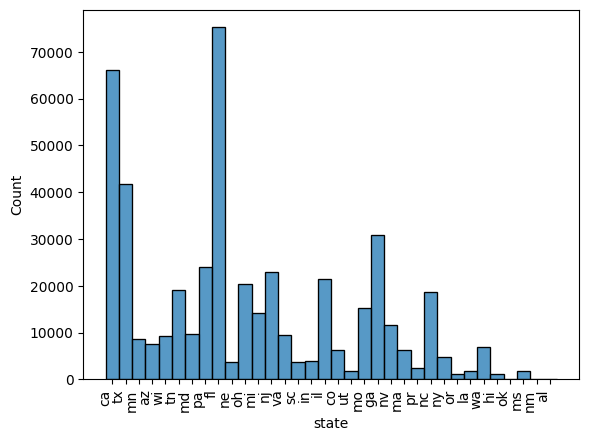

In [56]:
sns.histplot(df,x='state',bins=80)
plt.xticks(rotation=90,ha='right')
plt.show()

##### fl is state with highest number of sales

In [57]:
Avg_state_sale= round(df.groupby('state')['sellingprice'].mean())
sorted_avg_selling = Avg_state_sale.sort_values(ascending=False)
sorted_avg_selling.head(5)


state
tn    17285.0
co    15745.0
nv    15576.0
il    15404.0
mi    15182.0
Name: sellingprice, dtype: float64

##### tn is the state with highest average selling price

### What is the average selling price of vehicles in the dataset based on models/brands?

In [110]:
avg_selling =  df.groupby('make')['sellingprice'].mean()

print(avg_selling)

make
Acura             13104.780147
Aston Martin      55500.000000
Audi              20010.167638
BMW               21292.665791
Bentley           72713.333333
Buick             10588.182103
Cadillac          14733.198892
Chevrolet         11866.210434
Chrysler          10627.087887
Daewoo              450.000000
Dodge             10963.794342
FIAT               9927.416552
Ferrari          128852.941176
Fisker            46461.111111
Ford              14829.809413
GMC               16769.467831
Geo                 576.562500
HUMMER            15404.606771
Honda             10942.928453
Hyundai           11062.017418
Infiniti          20562.796303
Isuzu              1774.162011
Jaguar            19429.853620
Jeep              14755.975736
Kia               11767.492955
Lamborghini      111500.000000
Land Rover        33225.287443
Lexus             20284.201652
Lincoln           17547.191433
Lotus             40800.000000
MINI              12389.426341
Maserati          43729.816514
Maz

In [62]:
avg_selling = round( df.groupby('make')['sellingprice'].mean())
sorted_avg_selling = avg_selling.sort_values(ascending=False)
sorted_avg_selling.head(1)

make
Rolls-Royce    153456.0
Name: sellingprice, dtype: float64

#### Rolls-Royce was the vehicle with maximum average selling price

In [63]:
avg_selling = df.groupby('make')['sellingprice'].mean()
sorted_avg_selling = avg_selling.sort_values(ascending=True)
sorted_avg_selling.head(1)

make
Daewoo    450.0
Name: sellingprice, dtype: float64

#### Daewoo was the vehicle with minimum average selling price

## How does the odometer reading affect the selling price of vehicles?

In [144]:
correlation=df['odometer'].corr(df['sellingprice'])
print(correlation)

-0.5773903879411035


##### This signifies that readign of odometer is negatively correlated with the selling price of the vehicle.
##### i.e. As the odometer readign inc the selling price of vehicle dec. and vice-versa

## How does the Manheim Market Report (MMR) value correlate with the actual selling price of vehicles?

In [148]:
correlation=df['mmr'].corr(df['sellingprice'])
print(correlation)

0.9834933172249134


##### This signifies that readign of odometer is positively correlated with the selling price of the vehicle.
##### i.e. Inc in mmr increases  the selling price of vehicle

In [4]:
df.head()

,year,make,model,body,transmission,state,odometer,color,interior,seller,mmr,sellingprice,selldate
0,2014,BMW,6 Series,Convertible,automatic,ca,8819,black,black,the hertz corporation,68000,67200,2014
1,2014,Kia,Sorento,SUV,automatic,ca,9393,white,beige,kia motors america inc,20800,30000,2014
2,2014,BMW,3 Series,Sedan,automatic,ca,1331,gray,black,financial services remarketing (lease),31900,30000,2015
3,2015,Volvo,S60,Sedan,automatic,ca,14282,white,black,volvo na rep/world omni,27500,27750,2015
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,2641,gray,black,financial services remarketing (lease),66000,67000,2014


(array([1., 0., 0., 2., 0., 0., 3., 0., 0., 4.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

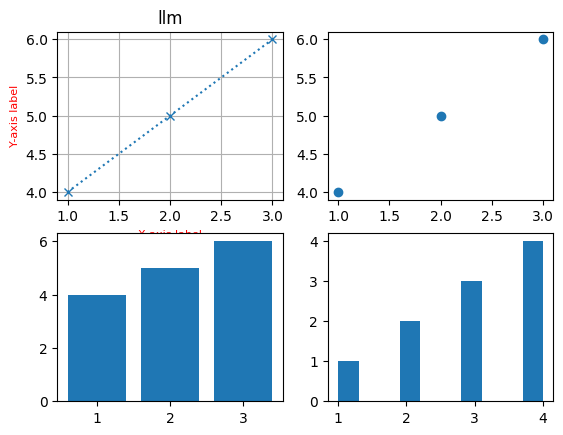

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)  # Select first subplot

ax2 = fig.add_subplot(2, 2, 2)  # Select second subplot
ax3 = fig.add_subplot(2, 2, 3)  # Select third subplot
ax4 = fig.add_subplot(2, 2, 4)  # Select fourth subplot

# Now you can plot on each individual subplot
ax1.plot([1, 2, 3], [4, 5, 6],linestyle=':',marker='x')
ax1.set_title("llm")
ax1.set_xlabel('X-axis label',fontsize=8,color='red')
ax1.set_ylabel('Y-axis label',fontsize=8,color='red')
ax1.grid(True)

ax2.scatter([1, 2, 3], [4, 5, 6])
ax3.bar([1, 2, 3], [4, 5, 6])
ax4.hist([1, 2, 2, 3, 3, 3, 4, 4, 4, 4])


In [81]:
df.head(4)

,year,make,model,body,transmission,state,odometer,color,interior,seller,mmr,sellingprice,selldate
0,2014,BMW,6 Series,Convertible,automatic,ca,8819,black,black,the hertz corporation,68000,67200,2014
1,2014,Kia,Sorento,SUV,automatic,ca,9393,white,beige,kia motors america inc,20800,30000,2014
2,2014,BMW,3 Series,Sedan,automatic,ca,1331,gray,black,financial services remarketing (lease),31900,30000,2015
3,2015,Volvo,S60,Sedan,automatic,ca,14282,white,black,volvo na rep/world omni,27500,27750,2015
